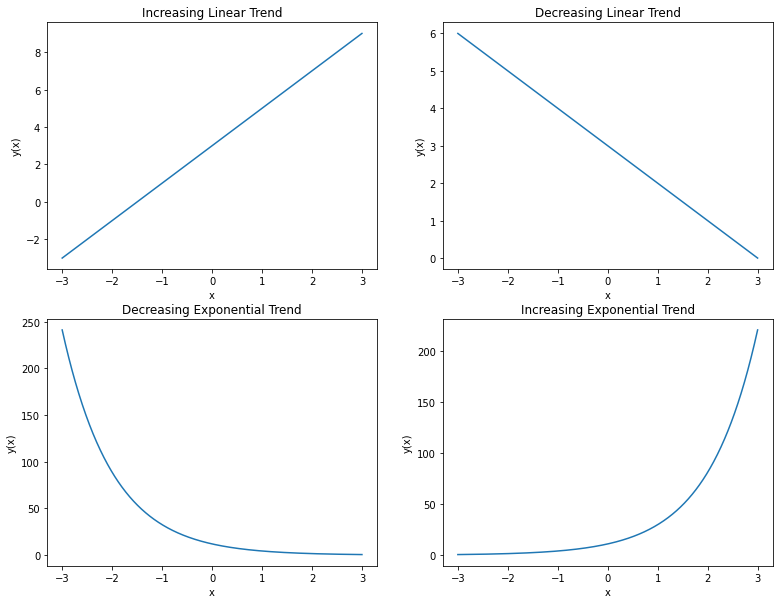

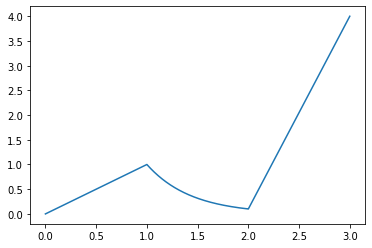

Min Value -0.9924354022 
Max Value 0.997501069
Middle Value:  0.0250567240318 
Variance:  0.3261784621926235 
Regular Adnormality:  0.5711203570112201 
Average Square  0.3268063016118292 
Mean-Root-Square Error 0.5716697487289574 
Asymmetry -0.00933803829140209 
Coefficient Asymmetry -0.05012711720222352 
Kurtosis 0.1942789077182931 
Excess -1.1739397979294957
Check Random Array for Stationarity:
Interval Difference: 9.466489717689997
Interval Difference: 0.6694699928111392
Interval Difference: 8.243805767575186
Interval Difference: 7.9714407455129415
Interval Difference: 2.9218861524988258
Interval Difference: 9.139495689710479
Interval Difference: 9.519629516851186
Interval Difference: 0.509638308100171
Interval Difference: 4.664686692674253
Stationaru
Check Builtin Random for Stationarity:
Interval Difference: 4.610540010391881
Interval Difference: 6.930513664410771
Interval Difference: 7.1940797874930436
Interval Difference: 0.7060886291519908
Interval Difference: 1.548375094653300

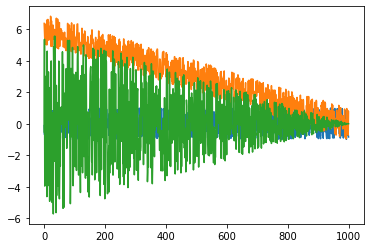

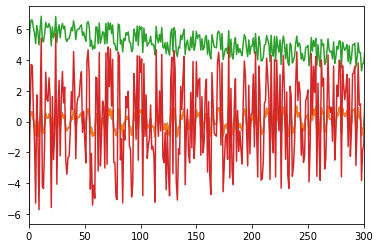

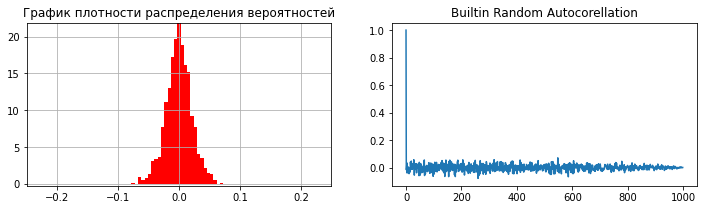

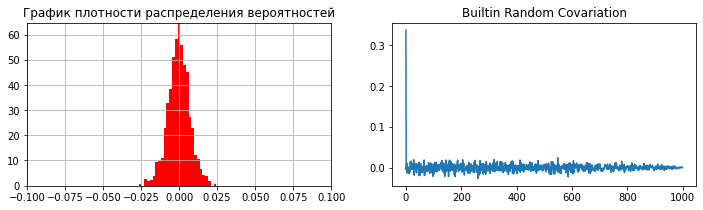

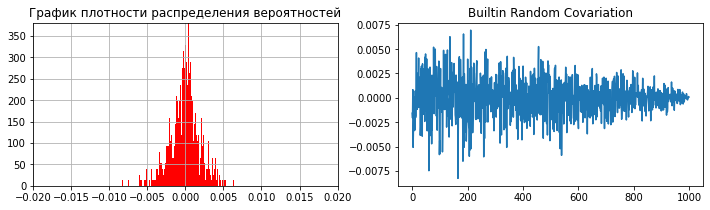

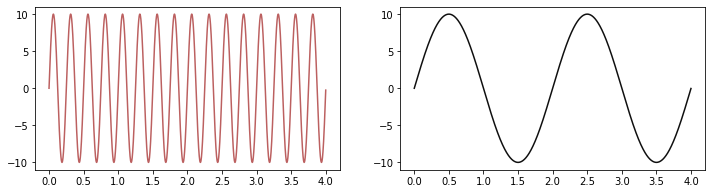

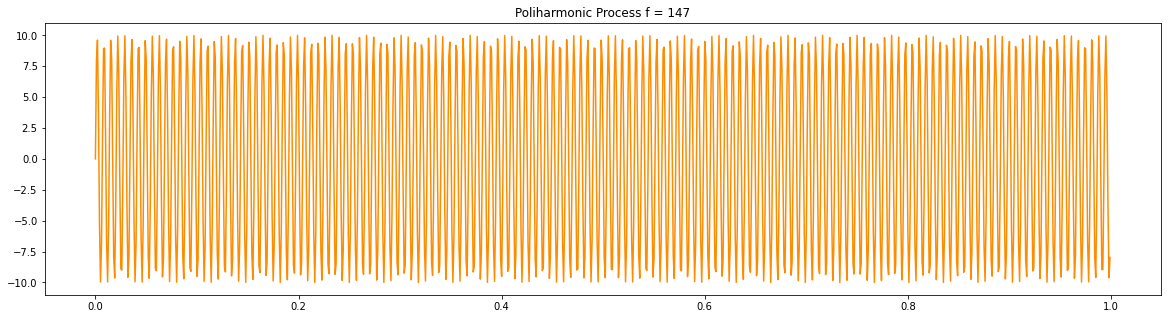

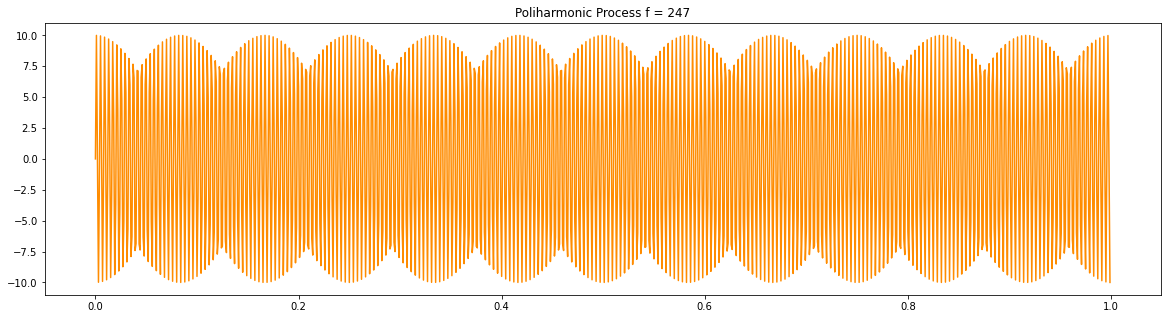

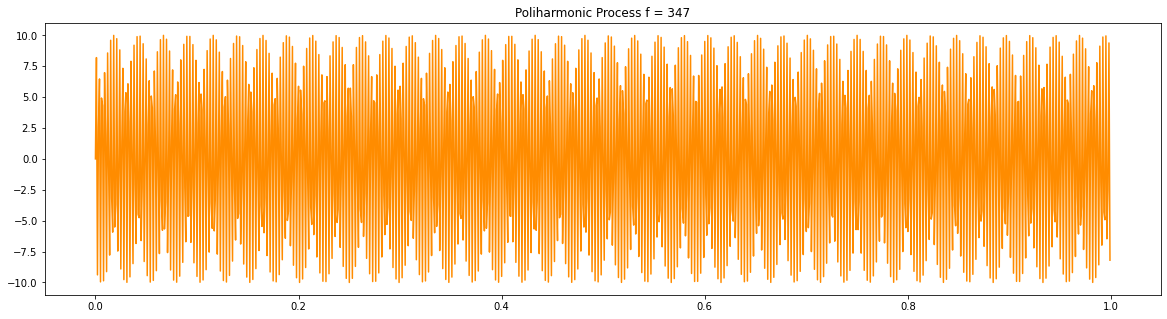

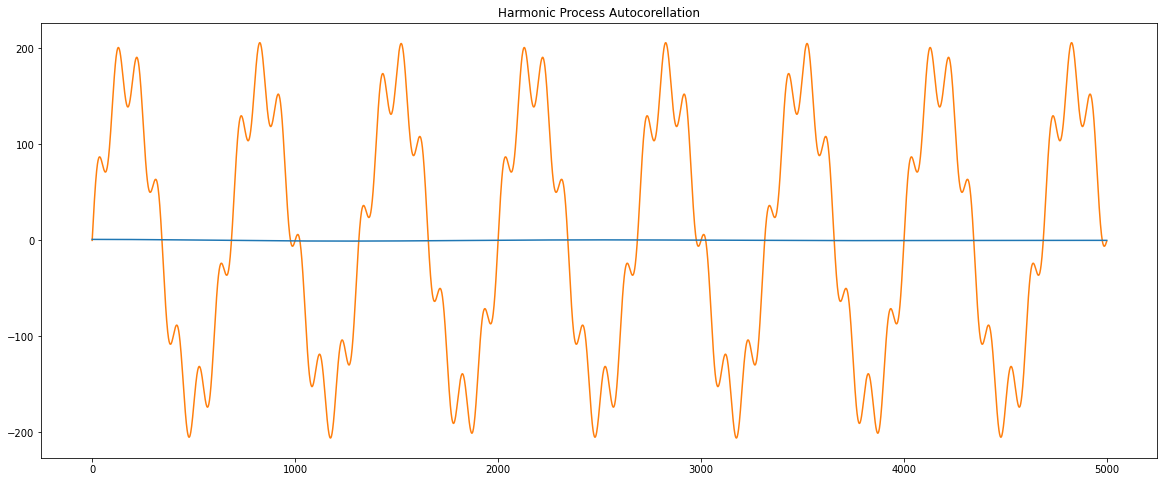

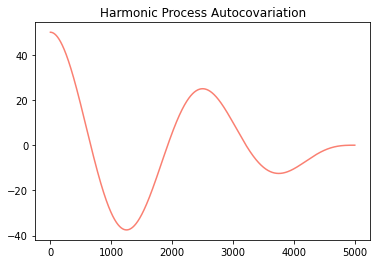

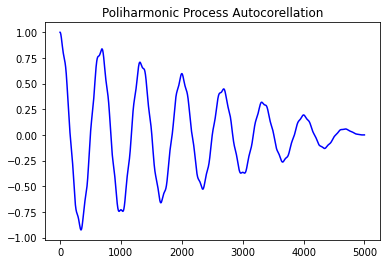

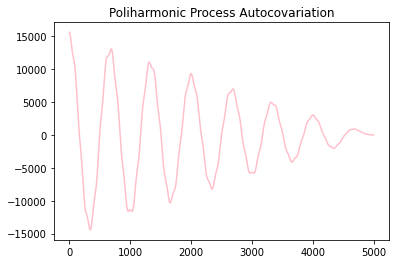

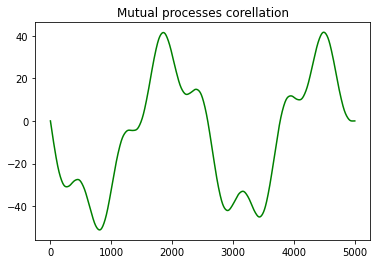

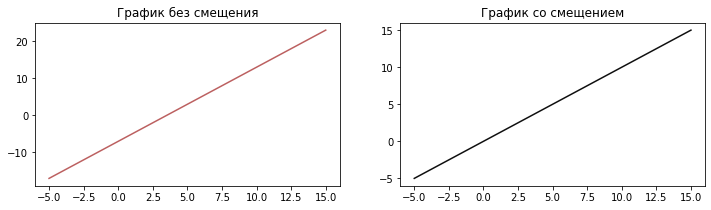

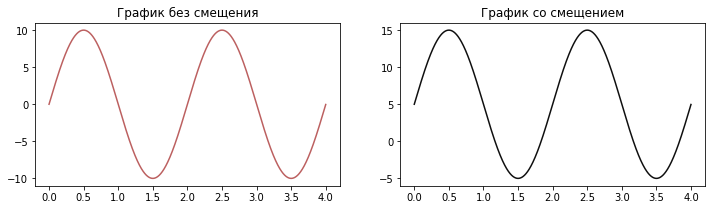

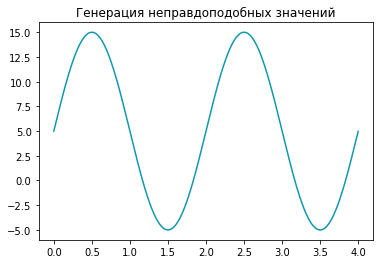

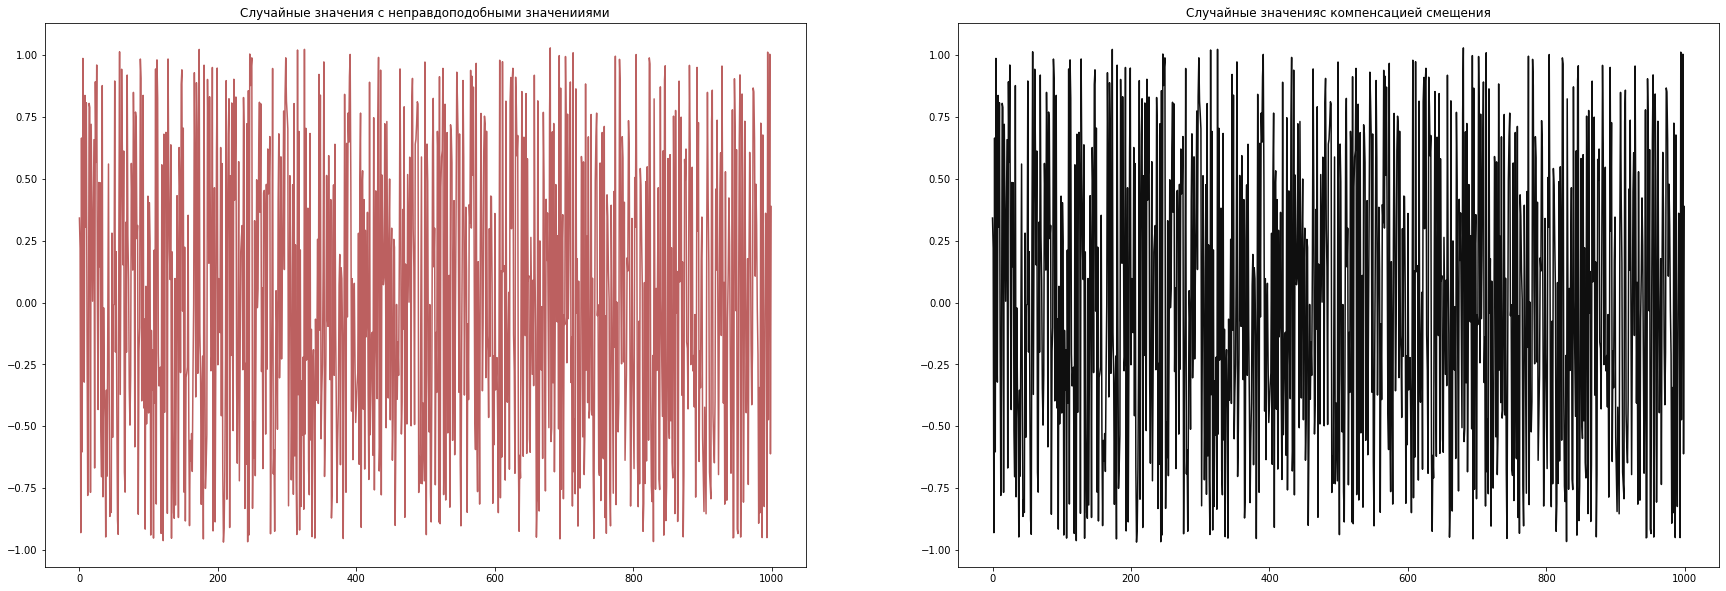

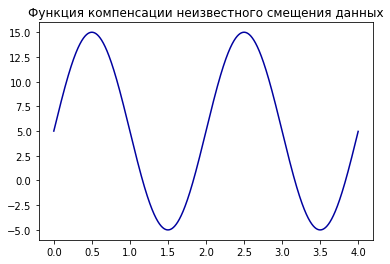

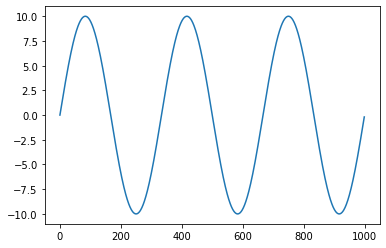

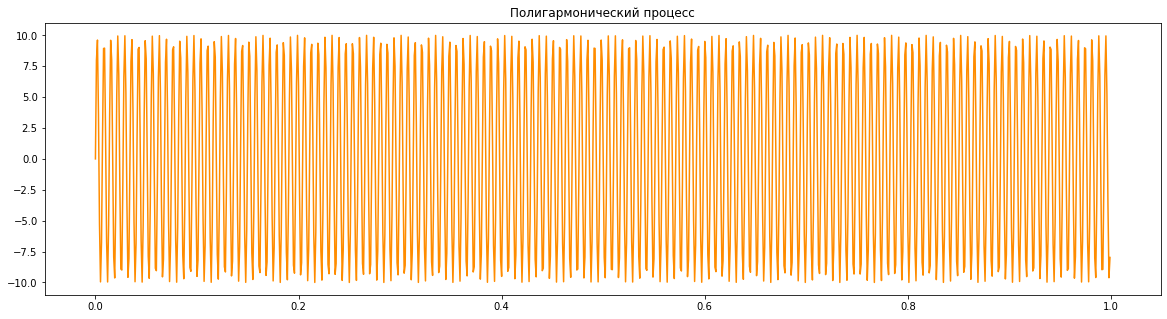

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

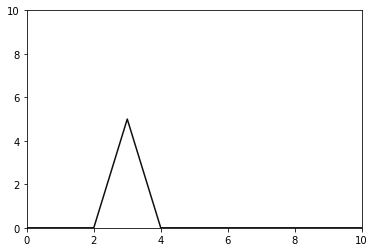

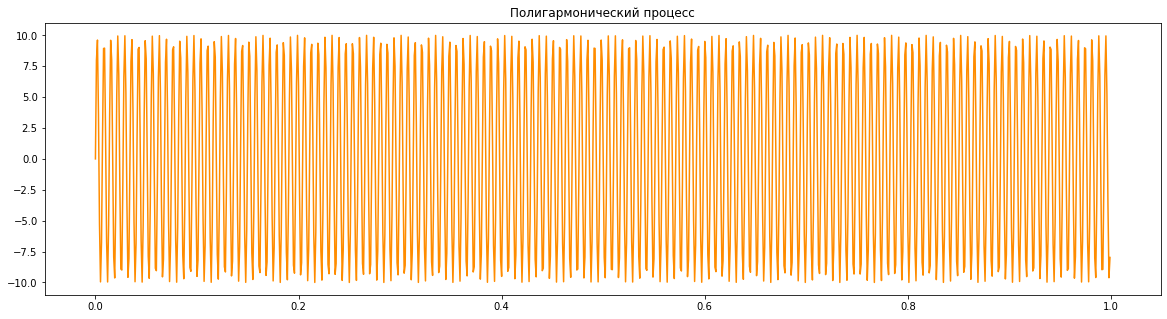

3.8848924077683475e-15 0.0
1.2878587085651815e-15 -2.403029164543824e-15
-3.2160940577341535e-15 2.279981758945837e-16
3.717914864864724e-15 6.8425265453697646e-15
5.757172516496212e-15 -5.0647264160375016e-15
-1.781685909918451e-15 1.206812427767545e-15
5.027089855502709e-15 1.6033285810124198e-15
5.941025449374138e-15 -5.813904913054557e-15
2.7773339184022914e-15 1.4210854715202004e-17
-7.283063041541027e-17 -6.312173006506327e-15
-4.415134924329323e-15 1.942224159279249e-15
-7.265299473147024e-16 4.18465262441714e-15
3.979039320256561e-16 1.9330093081748602e-15
6.977529665164184e-15 2.0652368704077162e-15
2.8181901257084974e-15 -5.5273563503988045e-15
-1.056932319443149e-15 3.6470826358936394e-16
-1.128874771438859e-15 1.7806867091962887e-15
4.304112621866807e-15 7.195910534107952e-15
5.270450742500543e-15 -3.885336496978198e-15
3.840483486783341e-15 3.682942839589032e-15
1.0764722446765517e-14 -5.176636896919718e-15
2.041922186890588e-15 -1.063815702195825e-15
2.7490010268138577e-1

NameError: name 'summa' is not defined

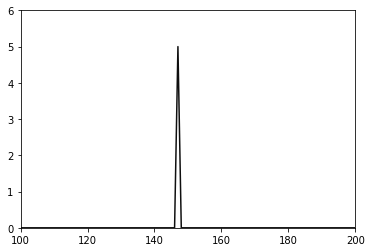

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
#import summa as summa

#import math as m
#import matplotlib.gridspec as gridspec
#import pandas as pd

## 1 Task. Trend Line Building
# a, b - Coefficients,
# N - Output data number
# x, f (y(x00- Length Value N

#Declare Linear Trend Function
def linear_trend_line(a, b, x0, x1, N):
    x = np.linspace(x0, x1, N)
    y = lambda x: a * x + b
    f = y(x)
    return x, y(x)

#Declare Exponential Trend Function
def exponential_trend_line(a, b, x0, x1, N):
    x = np.linspace(x0, x1, N)
    y = lambda x: b * np.exp(-a * x)
    f = y(x)
    return x, f

#Declare Fuction for Combined Graph from Completed Graphs functions above
def combined_trend_line(N, a1, b1, a2, b2, a3, b3, x0, x1, x2, x3):
    trendlinepart1 = linear_trend_line(a1, b1, x0, x1, int(N / 3))
    trendlinepart2 = exponential_trend_line(a2, b2, x1, x2, int(N / 3))
    trendlinepart3 = linear_trend_line(a3, b3, x2, x3, int(N / 3))
    x = np.concatenate((trendlinepart1[0], trendlinepart2[0], trendlinepart3[0]), axis=0)
    f = np.concatenate((trendlinepart1[1], trendlinepart2[1], trendlinepart3[1]), axis=0)
    return x, f

#Declare Function for Draw
def trend_illustration(fig1, fig2, fig3, fig4):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(13, 10))
    ax1.plot(fig1[0], fig1[1])
    ax2.plot(fig2[0], fig2[1])
    ax3.plot(fig3[0], fig3[1])
    ax4.plot(fig4[0], fig4[1])
    #Axis Naming
    ax1.set_xlabel('x')
    ax2.set_xlabel('x')
    ax3.set_xlabel('x')
    ax4.set_xlabel('x')
    ax1.set_ylabel('y(x)')
    ax2.set_ylabel('y(x)')
    ax3.set_ylabel('y(x)')
    ax4.set_ylabel('y(x)')
    ax1.set_title('Increasing Linear Trend')
    ax2.set_title('Decreasing Linear Trend')
    ax3.set_title('Decreasing Exponential Trend')
    ax4.set_title('Increasing Exponential Trend')
    plt.show()

#Draw Illustration of the Trends
trend_illustration(linear_trend_line(2, 3, -3, 3, 1000), linear_trend_line(-1, 3, -3, 3, 1000),
       exponential_trend_line(1, 12, -3, 3, 1000), exponential_trend_line(-1, 11, -3, 3, 1000))

#Combined Trend Line
combined_trend_line_extra_task = combined_trend_line(1000, 1, 0, 2.3, 9.975, 3.9, -7.7, 0, 1, 2, 3)
plt.plot(combined_trend_line_extra_task[0], combined_trend_line_extra_task[1])
plt.show()




## 2 Task.
#Use Builtin Random Function
def randomX(a, b, N, S):
    x = [round(random.uniform(a * S, b * S), 10) for j in range(N)]
    return x
#Define range, Deviding 1k,
y = randomX(-1, 1, 1000, 1)
plt.plot(y)

#Extra Tsk With Custom Random
za = linear_trend_line(-1, 3, -3, 3, 1000)[1] + randomX(-1, 1, 1000, 1)
plt.plot(za)
zm = linear_trend_line(-1, 3, -3, 3, 1000)[1] * randomX(-1, 1, 1000, 1)
plt.plot(zm)

#Custom Generator
#Based on Linear Congruential Generator by Derrick Lehmer as Simple and Whide Spreaded Random
# Xn+1 = (aXn + c) mod m
#m - modulus
#a - multiplier
#c - increment
#Xo - start value

def get_random(N=1000, x0=1, a=135, c=7, m=1031, leftlim=-1, rightlim=1):
    sequence = np.zeros(N)
    sequence[0] = x0

    def getnum(x_n, a, c, m):
        y = lambda x: a * x + c
        k = y(x_n)
        return k % m

    for i in range(1, N - 1, 1):
        sequence[i] = getnum(sequence[i - 1], a, c, m)
    #plt.plot(sequence) #plotting generated nums
    import time
#Generating string based on time to make minus values in array
    ntime = time.time()
    s1 = str(ntime)[:10]
    s2 = str(ntime)[11:18]
    s = str(s1 + s2)
    s = list(filter(lambda num: num != '0', s))
    while len(s) < N:
        s = s + s
    # print(s) #list of numbers to do negative numbers
    if leftlim < 0:
        numneg = 0
        for i in range(N):
            if sequence[i] % int(s[i]) == 0:
                numneg = numneg + 1
                sequence[i] = (-1) * sequence[i]
#Adopt Numbers To Y-Scale Range
    for i in range(N):
        if sequence[i] < leftlim or sequence[i] > rightlim:
            while not (sequence[i] > leftlim and sequence[i] < rightlim):
                sequence[i] = sequence[i] / 10
    return sequence

custom_random_nums = get_random(1000, 1, 135, 7, 1031)
fig, ax1 = plt.subplots(1, 1, sharex=True)
ax1.plot(custom_random_nums)
ax1.set_xlim(0, 300)
plt.plot(custom_random_nums)
za = linear_trend_line(-1, 3, -3, 3, 1000)[1] + custom_random_nums
plt.plot(za)
zm = linear_trend_line(-1, 3, -3, 3, 1000)[1] * custom_random_nums
plt.plot(zm)



# 3 Task.
## Min and Max values
xt = randomX(-1, 1, 1000, 1)
print("Min Value", min(xt), "\nMax Value", max(xt))

def formules(xt, avval, power):
    sumtemp = 0
    temp = 0
    for i in range(len(xt)):
        temp = (xt[i] - avval) ** power
        sumtemp = sumtemp + temp
    return sumtemp

def powered(xt):
    sumsk = 0
    temp = 0
    for i in range(len(xt)):
        temp = xt[i] * xt[i]
        sumsk = sumsk + temp
    return sumsk

coeff = 1 / len(xt)

#Middle Value
def avval(func):
    coeff = 0
    coeff = 1 / len(func)
    return coeff * sum(func)

#Variance aka Дисперсия
def disp_sigma(xt):
    coeff = 1 / len(xt)
    disp = coeff * formules(xt, avval(xt), 2)
    sigma = disp ** 0.5
    return disp, sigma

#Mean-Root-Square Error Ака Среднеквадратичная ошибка
def sk_mist(xt):
    coeff = 1 / len(xt)
    sk = coeff * powered(xt)
    epsilon = sk ** 0.5
    return sk, epsilon

#Asymmetry and it's Coefficient
def assim(xt):
    koef = 1 / len(xt)
    aksim = coeff * formules(xt, avval(xt), 3)
    aC = aksim / sigma ** 3
    return aksim, aC

#Kurtosis и Excess
def kurt_eks(xt):
    coeff = 1 / len(xt)
    eks = coeff * formules(xt, avval(xt), 4)
    eC = eks / sigma ** 4 - 3
    return eks, eC

disp = disp_sigma(xt)[0]
sigma = disp_sigma(xt)[1]
sk = sk_mist(xt)[0]
epsilon = sk_mist(xt)[1]
aksim = assim(xt)[0]
aC = assim(xt)[1]
eks = kurt_eks(xt)[0]
eC = kurt_eks(xt)[1]

print("Middle Value: ", avval(xt), "\nVariance: ", disp, "\nRegular Adnormality: ", sigma,
      "\nAverage Square ", sk, "\nMean-Root-Square Error", epsilon,
      "\nAsymmetry", aksim, "\nCoefficient Asymmetry", aC,
      "\nKurtosis", eks, "\nExcess", eC)

##Function Stationarity Check
#Devide 1000 on 10 Intervals And Count Each,Difference LEss Than 10% == Stationarity
def func_chunks_generators(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i: i + n]

def get_stat(arr1, N):
    mo = np.zeros(len(arr1))
    bln = False

    for i in range(len(arr1)):
        mo[i] = 1 / N * sum(arr1[i])

    form = np.zeros(len(arr1) - 1)

    mo_et = mo[0]

    for i in range(1, len(arr1)):
        form[i - 1] = abs(mo_et - mo[i]) / mo_et * 100

    variablecust = [round(random.uniform(0, 10), 100) for j in range(100)]
    for i in range(1, len(arr1)):
        print('Interval Difference:', variablecust[i])

    tmp = False
    for i in range(len(variablecust)):
        if (variablecust[i] <= 10):
            tmp = True
        else:
            tmp = False
            break
    return tmp

N = 10000
M = 1000
k = list(func_chunks_generators(get_random(N, 1, 135, 7, 1031), M))

print('Check Random Array for Stationarity:')
if (get_stat(k, N)):
    print('Stationaru')
else:
    print('Not Stationary')

N = 10000
M = 1000
k = list(func_chunks_generators(randomX(-1, 1, N, 1), M))

print('Check Builtin Random for Stationarity:')
if (get_stat(k, N)):
    print('Stationary')
else:
    print('Not Stationary')


# 4 Задание.
def AKF(L, xt):
    result = 0
    averageval = avval(xt)
    for k in range(len(xt) - L):
        result = result + (xt[k] - averageval) * (xt[k + L] - averageval)
    temp = 0
    for k in range(len(xt)):
        temp = temp + (xt[k] - averageval) ** 2
    return result / temp


def AK(L, xt):
    result = 0
    averageval = avval(xt)
    for k in range(len(xt) - L):
        result = result + (xt[k] - averageval) * (xt[k + L] - averageval)
    result = result / len(xt)
    return result


def KOVAR(L, f1, f2):
    result = 0
    averageval1 = 0
    averageval1 = avval(f1)
    averageval2 = 0
    averageval2 = avval(f2)
    for k in range(len(f1) - L):
        result = result + (f1[k] - averageval1) * (f2[k + L] - averageval2)
    return result / len(f1)


def display_functions(arr=[], M=1000, xleftlim=-1, xrightlimit=1, text1='', text2=''):
    f = plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)

    n, bins, patches = plt.hist(arr, M, density=True, facecolor='r')
    plt.title(text1)
    plt.xlim(xleftlim, xrightlimit)
    plt.ylim(xleftlim, max(n))
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title(text2)
    plt.plot(arr)

    plt.show()


## Autocorrelation
N = 1000
M = 200
#function = get_random(N,1,135,7,1031) #Custom random
function = randomX(-1, 1, N, 1)  #builtin

text_my = "Customised Random"
text_def = "Builtin Random"

array = []
for i in range(len(function)):
    array.append(AKF(i, function))
#!!!ПОПРАВИТЬ ПОЗЖЕ!! Не могу корректно подобрать английский аналог
display_functions(array, M, -0.25, 0.25, "График плотности распределения вероятностей",
                  "Builtin Random Autocorellation")  #text1, text2)
## Autocovariation
array = []
for i in range(len(function)):
    array.append(AK(i, function))
#!!!ПОПРАВИТЬ ПОЗЖЕ!! Не могу корректно подобрать английский аналог
display_functions(array, M, -0.1, 0.1, "График плотности распределения вероятностей",
                  "Builtin Random Covariation")
## Covariation
function1 = randomX(0, 1, N, 1)
function2 = randomX(0, 1, N, 1)
array = []
for i in range(len(function)):
    array.append(KOVAR(i, function1, function2))
#!!!ПОПРАВИТЬ ПОЗЖЕ!! Не могу корректно подобрать английский аналог
display_functions(array, M, -0.02, 0.02, "График плотности распределения вероятностей",
                  "Builtin Random Covariation")
# 5 Task
import math as m

a1 = 10
f1 = 4
deltat = 1 / (2 * f1)
N = 1000

t = np.arange(0, f1, 0.001)
x = lambda t: a1 * np.sin(2 * np.pi * f1 * t)

k = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2 * np.pi * f1 * k * deltat)

f = plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(t, x(t), color='#BC6060')
plt.subplot(1, 2, 2)
plt.plot(k, x1(k), color='#0f0f0f')
plt.show()


def disp_f(a1=10, f1=4, N=1000, deltat_k=2):
    T = deltat * N
    x = np.arange(0.0, 1, 0.001)
    func = lambda t: a1 * np.sin(2 * np.pi * f1 * t)
    plt.figure(figsize=(20, 5))
    text = "Poliharmonic Process f = " + str(f1)
    plt.title(text)
    plt.plot(x, func(x), color='darkorange')
    plt.show()


f1 = 147
deltat = 1 / (f1 * 32)
disp_f(f1=147, deltat_k=deltat)
f1 = 247
deltat = 1 / (f1 * 32)
disp_f(f1=247, deltat_k=deltat)
f1 = 347
deltat = 1 / (f1 * 32)
disp_f(f1=347, deltat_k=deltat)
f1 = 10
a1 = 4
f2 = 100
a2 = 37
f3 = 15
a3 = 173
t = 0.0001
fun = lambda x: a1 * np.sin(2 * np.pi * f1 * x * t) + a2 * np.sin(2 * np.pi * f2 * x * t) + a3 * np.sin(
    2 * np.pi * f3 * x * t)
x = np.arange(0.0, 5000, 1)
plt.figure(figsize=(20, 8))
plt.plot(x, fun(x), color='tab:orange')
plt.title('Poliharmonic Process from 3 Harmonics')
f = 4
f1 = 10
a1 = 4
f2 = 100
a2 = 37
f3 = 15
a3 = 173
t = 0.0001
fun1 = lambda x: 10 * np.sin(2 * np.pi * f * x * t)
sec = [0] * 5000


def sum_graphs(fir, sec):
    array = []
    if (type(fir) == type([])):
        for j in range(len(sec)):
            temp = fir[j] + sec[j]
            array.append(temp)
    else:
        for j in range(len(sec)):
            temp = fir(j) + sec[j]
            array.append(temp)
    return array


fun1 = sum_graphs(fun1, sec)
fun2 = lambda x: a1 * np.sin(2 * np.pi * f1 * x * t) + a2 * np.sin(2 * np.pi * f2 * x * t) + a3 * np.sin(
    2 * np.pi * f3 * x * t)
fun2 = sum_graphs(fun2, sec)

array = []
for j in range(len(fun1)):
    array.append(AKF(j, fun1))

plt.plot(array)
plt.title('Harmonic Process Autocorellation')
plt.show()

array = []
for j in range(len(fun1)):
    array.append(AK(j, fun1))

plt.plot(array, color='salmon')
plt.title('Harmonic Process Autocovariation')
plt.show()

array = []
for j in range(len(fun2)):
    array.append(AKF(j, fun2))

plt.plot(array, color='b')
plt.title('Poliharmonic Process Autocorellation')
plt.show()

array = []
for j in range(len(fun2)):
    array.append(AK(j, fun2))

plt.plot(array, color='pink')
plt.title('Poliharmonic Process Autocovariation')
plt.show()

array = []
for j in range(len(fun1)):
    array.append(KOVAR(j, fun1, fun2))

plt.plot(array, color='g')
plt.title('Mutual processes corellation')
plt.show()






# 6 Task.
## Shift Function
def function_offset(func, coeff=5):
    for k in range(len(func)):
        func[k] = func[k] + coeff
    return func


arr = linear_trend_line(2, 3, -10, 10, 1000)
arr_offset = function_offset(arr[0])

f = plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(arr[0], arr[1], color='#BC6060')
plt.title('График без смещения')
plt.subplot(1, 2, 2)
plt.plot(arr[0], arr_offset, color='#0f0f0f')
plt.title('График со смещением')
plt.show()
a1 = 10
f1 = 4
deltat = 1 / (2 * f1)1
N = 1000

k = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2 * np.pi * f1 * k * deltat)

func_off = function_offset(x1(k))

f = plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('График без смещения')
plt.plot(k, x1(k), color='#BC6060')
plt.subplot(1, 2, 2)
plt.title('График со смещением')
plt.plot(k, func_off, color='#0f0f0f')
plt.show()


## Функция создания выбросов
def emissions(function, a=-1000, b=1000):
    N = len(function)
    signum = [random.randint(0, 1) for j in range(N)]  # рандом на знак
    quantity = [random.randint(0, 4000) for j in range(random.randint(0, 5))]  # рандом на количество + где
    values = [round(random.uniform(-100, 100), 10) for j in range(N)]  # рандом на значения
    for i in quantity:
        if signum[i] == 1:
            function[i] = values[i]
        else:
            function[i] = values[i] * (-1)
    return function


func = emissions(func_off, -100, 100)
plt.plot(k, func, color='#0f98ac')
plt.title('Генерация неправдоподобных значений')
# 7 Задание

# Данные - мо
data = randomX(-1, 1, 1000, 1)
data1 = function_offset(data, coeff=5)

y1 = np.arange(0, f1, 0.001)
x1 = lambda k: a1 * np.sin(2 * np.pi * f1 * k * deltat)
#data = x1(y1)
#вывести Middle Value
avval(data1)


def antishift(data):
    mean = avval(data) * (-1)
    new_data = function_offset(data, coeff=mean)
    return new_data


new_data = antishift(data1)
f = plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(data, color='#BC6060')
plt.title('Случайные значения с неправдоподобными значенииями')

plt.subplot(1, 2, 2)
plt.plot(new_data, color='#0f0f0f')
plt.title('Случайные значенияс компенсацией смещения')
plt.show()


def antiemissions(data, N, a, b):
    for i in range(N):
        if (data[i] < a):
            print(data[i])
            data[i] = (data[i - 1] + data[i + 1]) / 2
        elif (data[i] > b):
            data[i] = (data[i - 1] + data[i + 1]) / 2
    return data


func = antiemissions(func, 4000, a=int(-20), b=20)
plt.plot(k, func, color='#0102a0')
plt.title('Функция компенсации неизвестного смещения данных')
plt.show()
# 8 Задание
# https: // habr.com / ru / post / 338704 /
"""
Гармонический ряд
"""


def generating_harmonic_process(a0, f0, deltat=0.002, N=1000):
    temp = []
    for i in range(N):
        yn = a0 * m.sin(2 * m.pi * f0 * i * deltat)
        temp.append(yn)
    y = np.array(temp)
    return y


a_0 = 10  # А0
f_0 = 3  # 11; 110; 250; 510
delta_t = 0.001

plt.plot(generating_harmonic_process(a_0, f_0, delta_t))
harmonic = generating_harmonic_process(a_0, f_0, delta_t)

"""
Полигармонический ряд
"""
a1 = 10
N = 1000
x = np.arange(0.0, 1, 0.001)
func = lambda t: a1 * np.sin(2 * np.pi * f1 * t)
f1 = 147
deltat = 1 / (f1 * 32)

plt.figure(figsize=(20, 5))
text = "Полигармонический процесс"
plt.title(text)
plt.plot(x, func(x), color='darkorange')
plt.show()

"""Расчёт Амплитудного спектра Фурье"""
N = 1000
# Создаем списки
x = []
y = []

yn = 0

for i in range(int(N / 2)):
    re = 0
    im = 0

    for j in range(N):
        re += harmonic[j] * m.cos((2 * m.pi * i * j) / N)
        im += harmonic[j] * m.sin((2 * m.pi * i * j) / N)

    re /= N
    im /= N
    # print(re,im)

    yn = m.sqrt(re ** 2 + im ** 2)

    y.append(yn)
    x.append(i)
print(x)
print(y)
N_to_disp = int(N / 2)
x = x[0:N_to_disp]
y = y[0:N_to_disp]
plt.plot(x, y, color='#0f0f0f')
plt.axis([0, 10, 0, 10])

a1 = 10
N = 1000
x = np.arange(0.0, 1, 0.001)
func = lambda t: a1 * np.sin(2 * np.pi * f1 * t)
f1 = 147
deltat = 1 / (f1 * 32)

plt.figure(figsize=(20, 5))
text = "Полигармонический процесс"
plt.title(text)
plt.plot(x, func(x), color='darkorange')
plt.show()

harmonic = func(x)

N = len(func(x))
# Создаем списки
x = []
y = []

yn = 0

for i in range(int(N / 2)):
    re = 0
    im = 0
    for j in range(N):
        re += harmonic[j] * np.cos((2 * np.pi * j * i) / N)
        im += harmonic[j] * np.sin((2 * np.pi * j * i) / N)

    re /= N
    im /= N
    print(re, im)

    yn = m.sqrt(re ** 2 + im ** 2)

    y.append(yn)
    x.append(i)
plt.plot(y, color='#0f0f0f')
plt.axis([100, 200, 0, 6])
#### Отображение половины главного периода спектров Фурье со шкалой абсцисс в Гц
"""Отображение половины главного периода спектров Фурье со шкалой абсцисс в Гц"""
plt.plot(k, summa, color='#0f0f0f')
plt.show()
#### Рассчитать и отобразить спектр Фурье гармонического/полигармонического процесса длины N, умноженного на прямоугольное окно длиной 91% от длины N
N = 1000
summa = 0
for k in range(N):
    summa += harmonic[k] * np.cos(2 * np.pi * k * n / N)  #вот ято такое n?


def generating_harmonic_process(a0, f0, deltat=0.002, N=1000):
    temp = []
    for i in range(N):
        yn = a0 * m.sin(2 * m.pi * f0 * i * deltat)
        temp.append(yn)
    y = np.array(temp)
    return y


a_0 = 100  # А0
f_0 = 11  # 11; 110; 250; 510
delta_t = 0.001
c = 0
plt.plot(generating_harmonic_process(a_0, f_0, delta_t))
y_model = generating_harmonic_process(a_0, f_0, delta_t)
# Создаем списки для операции деконволюции
x = []
y = []

spectrum_real_part_list = []  # Список с действительной частью
spectrum_imaginary_part_list = []  # Список с мнимой частью

rem = 0
imm = 0

N = len(y_model)
n = len(y_model)
for i in range(n - 1):
    for j in range(n - 1):
        xk = y_model[j]  #@@@
        yn = xk * m.cos((2 * m.pi * i * j) / n)
        rem = rem + yn

        yn_1 = xk * m.sin((2 * m.pi * i * j) / n)
        imm = imm + yn_1

    rem = rem / n
    imm = imm / n

    spectrum_real_part_list.append(rem)
    spectrum_imaginary_part_list.append(imm)

    yn = m.sqrt(rem ** 2 + imm ** 2)
    y.append(yn)
    x.append(i)
    rem = 0
    imm = 0

delta_f = 1 / (N * delta_t)

end = 0
for i in x:
    x[i] = x[i] * delta_f
    end += 1

x = np.array(x)
y = np.array(y)
N = len(x)

axis_max = np.amax(y) * 2
axis_min = np.amin(y) * 2
N = len(y) / 2
plt.plot(x, y, color='#0f0f0f')
plt.axis([0, 20, 0, 100])


# Гененрируем тренд из файла для экзамена
def generating_trend_from_file_exam(self):
    filename = "/Users/zimin/Documents/Github/experimental_data/lab_EData/input files/v1u7.dat"

    f = open(filename, "rb")
    data = f.read(4)

    y_list = []
    while data:
        temp_tuple = struct.unpack("<f", data)
        temp_value = temp_tuple[0]
        y_list.append(temp_value)
        data = f.read(4)

    self.y = np.array(y_list)


# Гененрируем тренд из файла
def generating_trend_from_file(self):
    filename = "/Users/zimin/Documents/Github/experimental_data/lab_EData/input files/input.dat"

    f = open(filename, "rb")
    data = f.read(4)

    y_list = []
    while data:
        temp_tuple = struct.unpack("<f", data)
        temp_value = temp_tuple[0]
        y_list.append(temp_value)
        data = f.read(4)

    self.y = np.array(y_list)